In [34]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import missingno as mn
from datetime import datetime
from functools import reduce
plt.style.use("default")

In [3]:
price_files = os.listdir("../Cryptocompare data/Prices")

In [7]:
cryptocompare_data = dict(
    zip(
        [file[:-4] for file in price_files if file[-4:] == ".csv"],
        [pd.read_csv("../Cryptocompare data/Prices/" + file, index_col= "Unnamed: 0") for file in price_files if file[-4:] == ".csv"]
    )
)

In [8]:
prices = {key : cryptocompare_data[key]["close"] for key in cryptocompare_data.keys()}

In [19]:
returns = {key : prices[key].pct_change() for key in cryptocompare_data.keys()}
for return_series in returns.values():
    return_series[return_series == np.infty] = 0

In [31]:
max_returns = [np.max(return_series) for return_series in returns.values()]
log_max_returns = [np.log(return_series) for return_series in max_returns]

/var/folders/13/d37n485s17n292n_3yvvjbw00000gn/T/ipykernel_11046/2486287240.py:2: RuntimeWarning: divide by zero encountered in log
  log_max_returns = [np.log(return_series) for return_series in max_returns]


In [42]:
max_returns_df = pd.DataFrame({"Maximum log-returns" :log_max_returns})

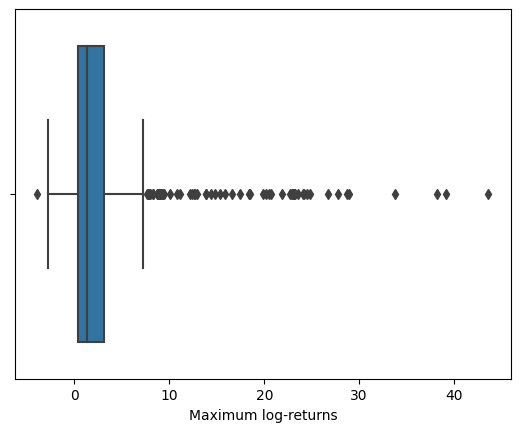

In [44]:
fig, ax = plt.subplots()
sns.boxplot(data = max_returns_df, x = "Maximum log-returns")
plt.savefig("../Plots/Boxplot max log returns.png", transparent = True, dpi = 600)